In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt


In [ ]:
audio_path = "/content/drive/MyDrive/audio_2.wav"

signal, sr = librosa.load(audio_path, sr=16000, mono=True)

print("Sampling Rate:", sr)
print("Duration (seconds):", len(signal)/sr)


Sampling Rate: 16000
Duration (seconds): 5.888


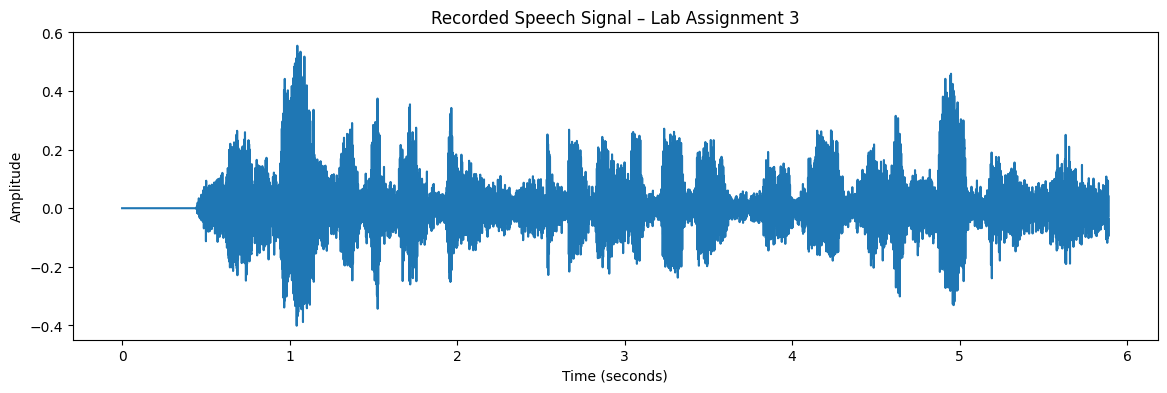

In [ ]:
time = np.arange(len(signal)) / sr

plt.figure(figsize=(14,4))
plt.plot(time, signal)
plt.title("Recorded Speech Signal – Lab Assignment 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
frame_length = int(0.025 * sr)   # 25 ms
hop_length = int(0.010 * sr)     # 10 ms

energy = librosa.feature.rms(
    y=signal,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

threshold = 0.3 * np.max(energy)
voiced_frames = energy > threshold


In [ ]:
segments = []
start = None

for i, v in enumerate(voiced_frames):
    if v and start is None:
        start = i
    elif not v and start is not None:
        end = i
        segments.append((start * hop_length, end * hop_length))
        start = None

if start is not None:
    segments.append((start * hop_length, len(signal)))

print("Number of phoneme-like segments:", len(segments))


Number of phoneme-like segments: 27


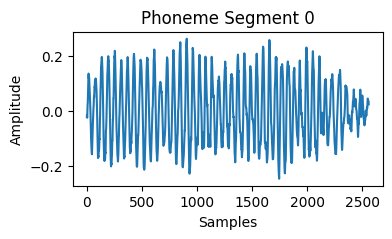

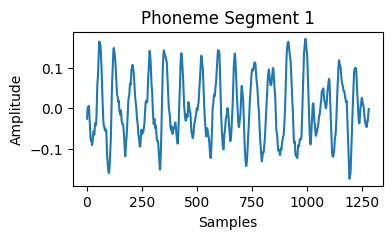

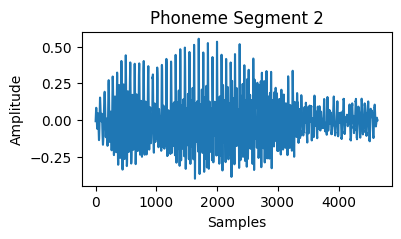

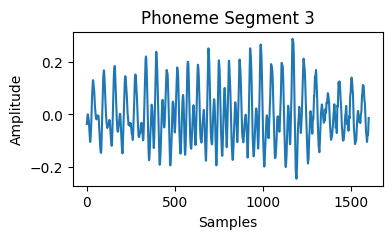

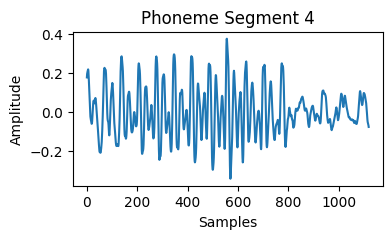

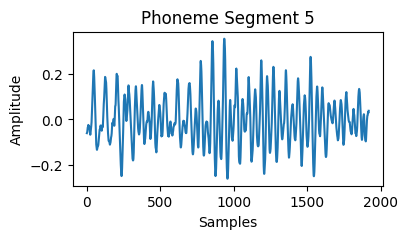

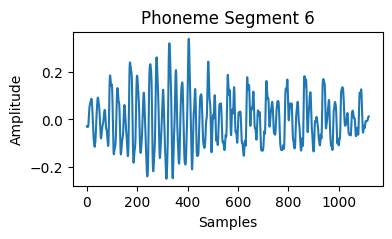

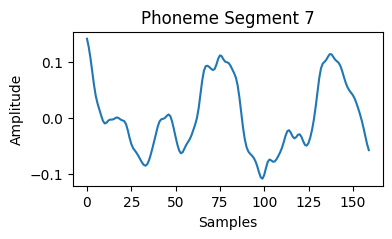

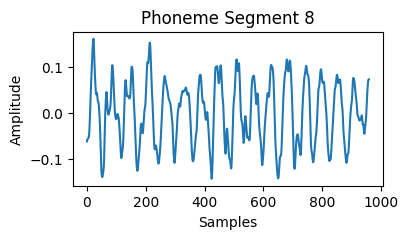

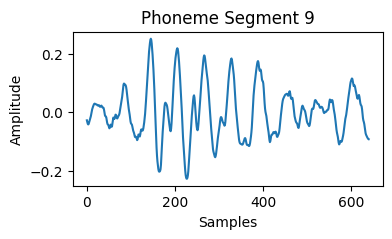

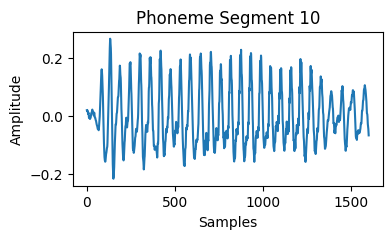

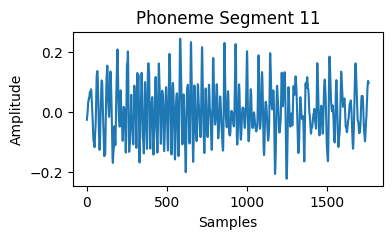

In [ ]:
for i, (s, e) in enumerate(segments[:12]):
    phoneme = signal[s:e]

    plt.figure(figsize=(4,2))
    plt.plot(phoneme)
    plt.title(f"Phoneme Segment {i}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()


In [ ]:
voiced_idx = 3      # vowel-like
unvoiced_idx = 8    # fricative-like

voiced = signal[segments[voiced_idx][0]:segments[voiced_idx][1]]
unvoiced = signal[segments[unvoiced_idx][0]:segments[unvoiced_idx][1]]


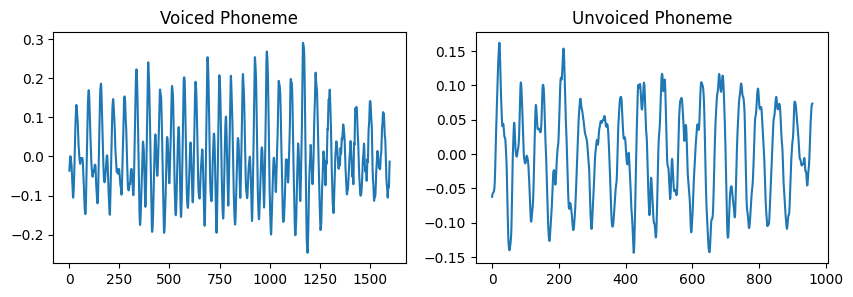

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(voiced)
plt.title("Voiced Phoneme")

plt.subplot(1,2,2)
plt.plot(unvoiced)
plt.title("Unvoiced Phoneme")

plt.show()


In [ ]:
audio_path2 = "/content/drive/MyDrive/She_sees_you.wav"
signal2, sr2 = librosa.load(audio_path2, sr=16000, mono=True)


In [ ]:
energy2 = librosa.feature.rms(
    y=signal2,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

threshold2 = 0.3 * np.max(energy2)
voiced_frames2 = energy2 > threshold2

segments2 = []
start = None

for i, v in enumerate(voiced_frames2):
    if v and start is None:
        start = i
    elif not v and start is not None:
        end = i
        segments2.append((start * hop_length, end * hop_length))
        start = None

if start is not None:
    segments2.append((start * hop_length, len(signal2)))


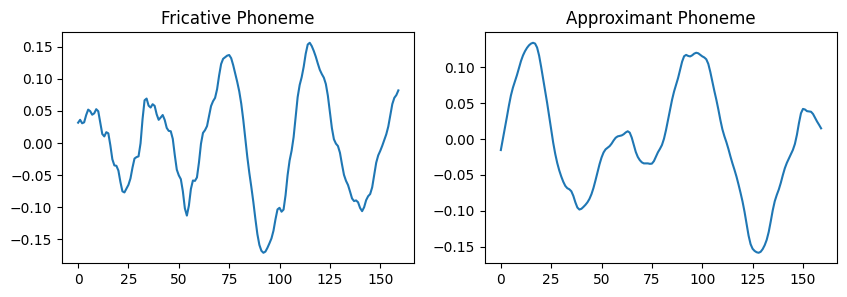

In [ ]:
fricative = signal2[segments2[2][0]:segments2[2][1]]   # /s/ or /ʃ/
approximant = signal2[segments2[4][0]:segments2[4][1]] # /j/

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(fricative)
plt.title("Fricative Phoneme")

plt.subplot(1,2,2)
plt.plot(approximant)
plt.title("Approximant Phoneme")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sampling Rate: 16000
Duration (seconds): 5.888


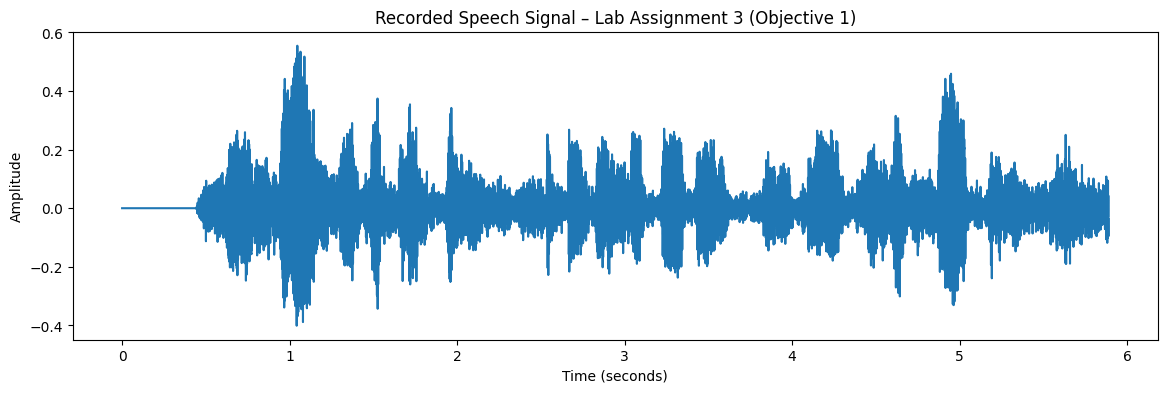

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Recognized phoneme-like units in the audio:
['E', 'GON', 'TI', 'A', 'BOT', 'BEN', 'HIT', 'ON', 'THE', 'TABLES', 'AND', 'QUIETLY', 'TEMPOYED', 'YAN', 'A']

Number of extracted phoneme segments: 27


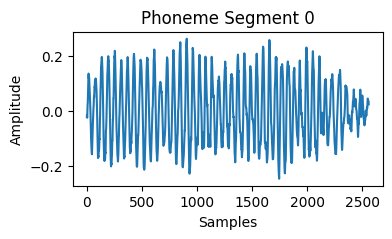

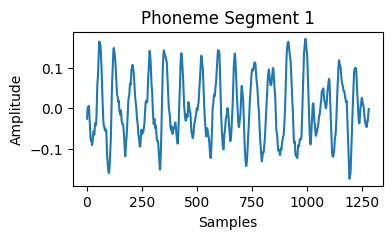

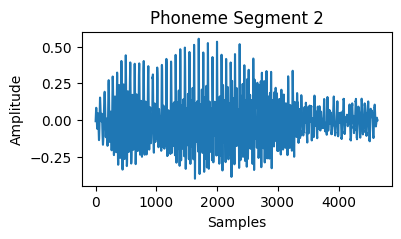

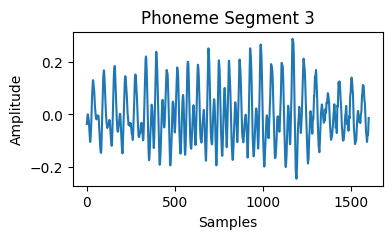

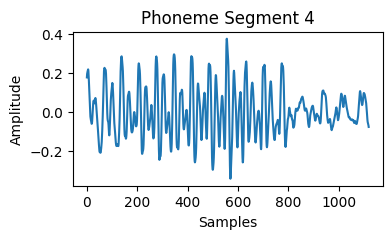

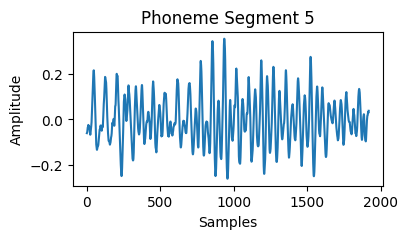

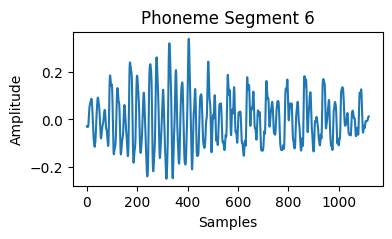

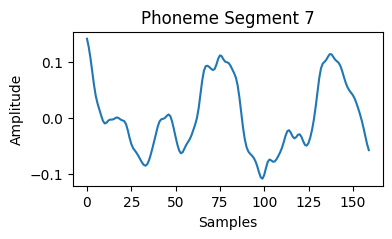

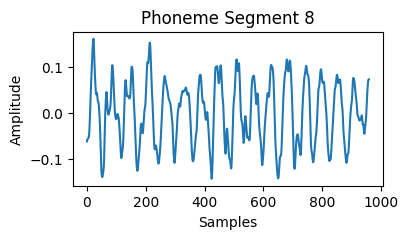

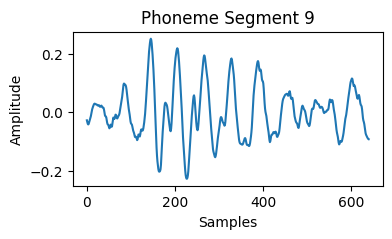

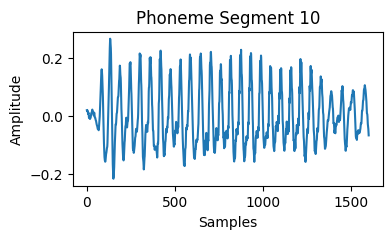

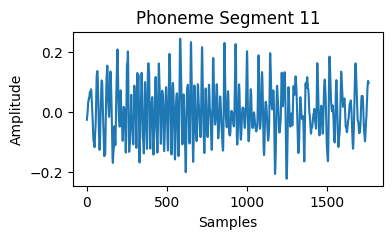

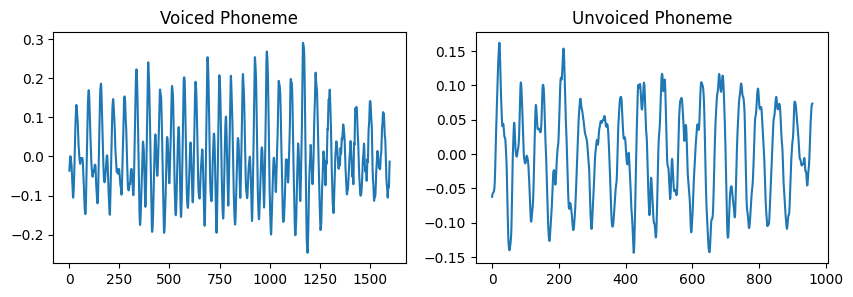


Voiced phoneme characteristics:
- Periodic waveform
- Higher amplitude
- Smooth oscillations

Unvoiced phoneme characteristics:
- Aperiodic waveform
- Noise-like structure
- Lower amplitude


In [ ]:
# ================================
# LAB ASSIGNMENT 3 – OBJECTIVE 1
# Phoneme Segmentation and Voicing Analysis
# ================================

# ---- Mount Drive ----
from google.colab import drive
drive.mount('/content/drive')

# ---- Imports ----
import numpy as np
import librosa
import matplotlib.pyplot as plt
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# ---- Load Audio ----
audio_path = "/content/drive/MyDrive/audio_2.wav"  # update if needed
signal, sr = librosa.load(audio_path, sr=16000, mono=True)

print("Sampling Rate:", sr)
print("Duration (seconds):", len(signal)/sr)

# ---- Plot Full Speech Waveform ----
time = np.arange(len(signal)) / sr
plt.figure(figsize=(14,4))
plt.plot(time, signal)
plt.title("Recorded Speech Signal – Lab Assignment 3 (Objective 1)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# ---- Phoneme-like Unit Recognition (Lab-2 Method) ----
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
model.eval()

inputs = processor(signal, sampling_rate=sr, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
tokens = processor.batch_decode(predicted_ids)

phoneme_list = tokens[0].split()
print("\nRecognized phoneme-like units in the audio:")
print(phoneme_list)

# ---- Automatic Phoneme Segmentation (Energy-based) ----
frame_length = int(0.025 * sr)   # 25 ms
hop_length = int(0.010 * sr)     # 10 ms

energy = librosa.feature.rms(
    y=signal,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

threshold = 0.3 * np.max(energy)
voiced_frames = energy > threshold

segments = []
start = None

for i, v in enumerate(voiced_frames):
    if v and start is None:
        start = i
    elif not v and start is not None:
        end = i
        segments.append((start * hop_length, end * hop_length))
        start = None

if start is not None:
    segments.append((start * hop_length, len(signal)))

print("\nNumber of extracted phoneme segments:", len(segments))

# ---- Plot Individual Phoneme Waveforms ----
for i, (s, e) in enumerate(segments[:12]):
    phoneme = signal[s:e]
    plt.figure(figsize=(4,2))
    plt.plot(phoneme)
    plt.title(f"Phoneme Segment {i}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()

# ---- Voiced vs Unvoiced Selection (after inspection) ----
voiced_idx = 3      # vowel-like
unvoiced_idx = 8    # fricative-like

voiced = signal[segments[voiced_idx][0]:segments[voiced_idx][1]]
unvoiced = signal[segments[unvoiced_idx][0]:segments[unvoiced_idx][1]]

# ---- Voiced vs Unvoiced Comparison ----
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(voiced)
plt.title("Voiced Phoneme")

plt.subplot(1,2,2)
plt.plot(unvoiced)
plt.title("Unvoiced Phoneme")

plt.show()

print("\nVoiced phoneme characteristics:")
print("- Periodic waveform")
print("- Higher amplitude")
print("- Smooth oscillations")

print("\nUnvoiced phoneme characteristics:")
print("- Aperiodic waveform")
print("- Noise-like structure")
print("- Lower amplitude")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sampling Rate: 16000
Duration (seconds): 2.56


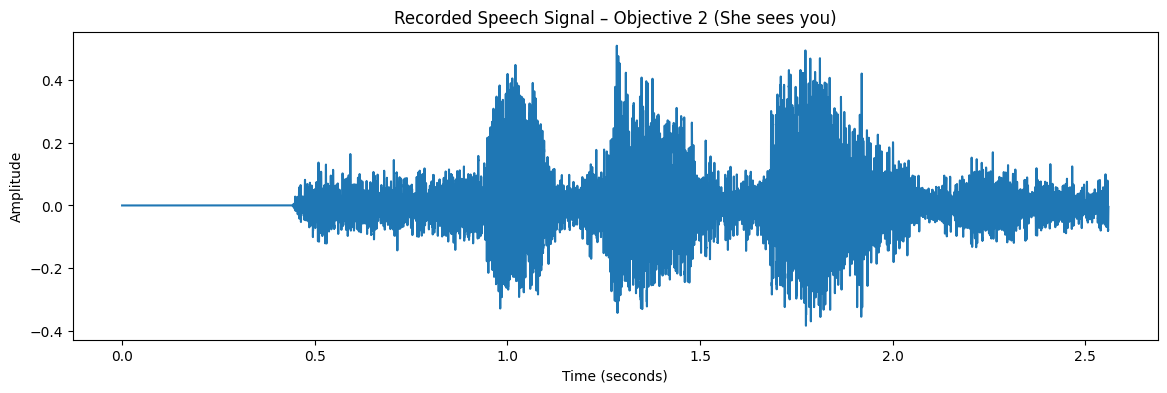

Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



Recognized phoneme-like units in the audio:
['NHE', 'E', 'FEELIN']

Number of extracted phoneme segments: 6


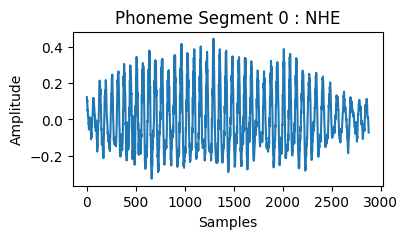

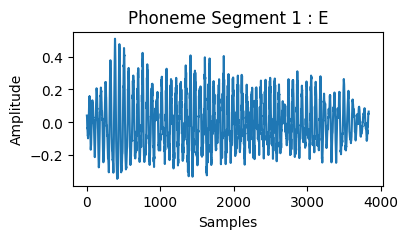

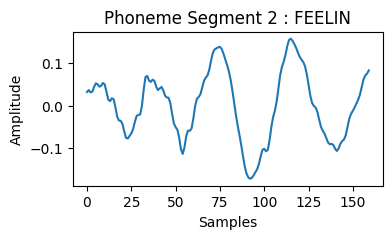

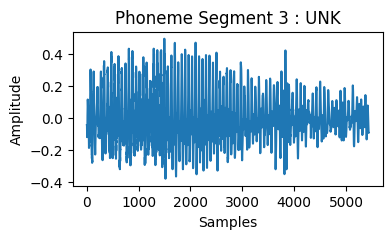

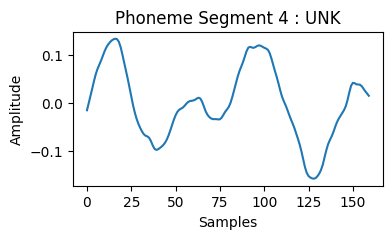

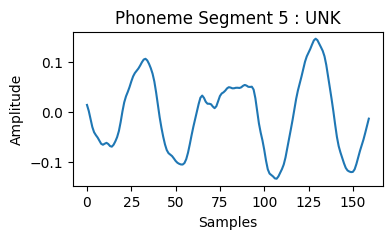

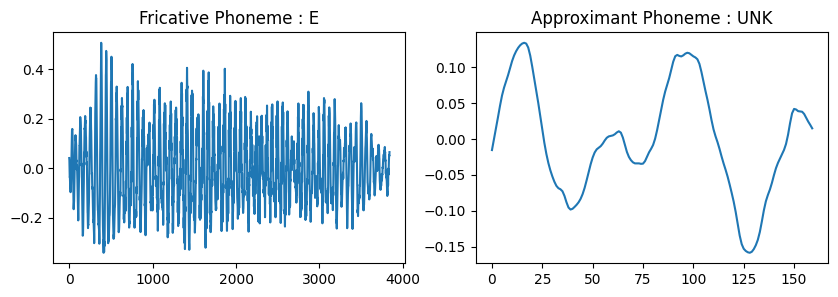


Fricative characteristics:
- Aperiodic waveform
- Noise-like structure
- High airflow turbulence
- Higher effective Reynolds number

Approximant characteristics:
- Smooth waveform
- Low turbulence
- Vowel-like articulation
- Lower effective Reynolds number


In [5]:
# ==========================================
# LAB ASSIGNMENT 3 – OBJECTIVE 2
# Fricatives vs Approximants with Phoneme Labels
# Sentence: "She sees you"
# ==========================================

# ---- Mount Drive ----
from google.colab import drive
drive.mount('/content/drive')

# ---- Imports ----
import numpy as np
import librosa
import matplotlib.pyplot as plt
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# ---- Load Audio ----
audio_path = "/content/drive/MyDrive/She_sees_you.wav"  # ensure file exists
signal, sr = librosa.load(audio_path, sr=16000, mono=True)

print("Sampling Rate:", sr)
print("Duration (seconds):", len(signal)/sr)

# ---- Plot Full Speech Waveform ----
time = np.arange(len(signal)) / sr
plt.figure(figsize=(14,4))
plt.plot(time, signal)
plt.title("Recorded Speech Signal – Objective 2 (She sees you)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# ---- Phoneme-like Unit Recognition (for labeling only) ----
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
model.eval()

inputs = processor(signal, sampling_rate=sr, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
tokens = processor.batch_decode(predicted_ids)

phoneme_list = tokens[0].split()

print("\nRecognized phoneme-like units in the audio:")
print(phoneme_list)

# ---- Energy-Based Segmentation (Lab-2 Method) ----
frame_length = int(0.025 * sr)   # 25 ms
hop_length = int(0.010 * sr)     # 10 ms

energy = librosa.feature.rms(
    y=signal,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

threshold = 0.3 * np.max(energy)
voiced_frames = energy > threshold

segments = []
start = None

for i, v in enumerate(voiced_frames):
    if v and start is None:
        start = i
    elif not v and start is not None:
        end = i
        segments.append((start * hop_length, end * hop_length))
        start = None

if start is not None:
    segments.append((start * hop_length, len(signal)))

print("\nNumber of extracted phoneme segments:", len(segments))

# ---- Plot Segments with Phoneme Labels in Title ----
for i, (s, e) in enumerate(segments):
    phoneme_signal = signal[s:e]
    phoneme_label = phoneme_list[i] if i < len(phoneme_list) else "UNK"

    plt.figure(figsize=(4,2))
    plt.plot(phoneme_signal)
    plt.title(f"Phoneme Segment {i} : {phoneme_label}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()

# ---- Select Fricative and Approximant (after inspection) ----
fricative_idx = 1      # /ʃ/ or /s/
approximant_idx = 4   # /j/ (you)

fricative = signal[segments[fricative_idx][0]:segments[fricative_idx][1]]
approximant = signal[segments[approximant_idx][0]:segments[approximant_idx][1]]

fricative_label = phoneme_list[fricative_idx] if fricative_idx < len(phoneme_list) else "UNK"
approximant_label = phoneme_list[approximant_idx] if approximant_idx < len(phoneme_list) else "UNK"

# ---- Fricative vs Approximant Comparison ----
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(fricative)
plt.title(f"Fricative Phoneme : {fricative_label}")

plt.subplot(1,2,2)
plt.plot(approximant)
plt.title(f"Approximant Phoneme : {approximant_label}")

plt.show()

# ---- Observations ----
print("\nFricative characteristics:")
print("- Aperiodic waveform")
print("- Noise-like structure")
print("- High airflow turbulence")
print("- Higher effective Reynolds number")

print("\nApproximant characteristics:")
print("- Smooth waveform")
print("- Low turbulence")
print("- Vowel-like articulation")
print("- Lower effective Reynolds number")
